In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
t = [*range(int(5e7),int(1.5e9),10000)] #range waktu dalam tahun (nilai awal,nilai akhirm increment)
k = 1e-4 #Rosseland mean opacity
c = 4.66 #konstanta

In [14]:
T_pandas = pd.Series(t)
T_pandas_ = pd.DataFrame(T_pandas)
Times = T_pandas_[0]
T_pandas_['Times'] = Times
T_pandas_.drop(columns = 0, inplace=True)
T_pandas_.head()

,Times
0,50000000
1,50010000
2,50020000
3,50030000
4,50040000


In [15]:
def stevenson(m):
    T_pandas1 = pd.Series(t)
    T_pandas1_ = pd.DataFrame(T_pandas1)
    Times = T_pandas1_[0]
    T_pandas1_['Times'] = Times
    T_pandas1_.drop(columns = 0, inplace=True)
    T_pandas1_.head()
    
    L = 1.5e-5*((5e9/T_pandas_['Times'])**(5/4))*((m/0.08)**(5/2))*((k/1e-2)**0.3) #persamaan Luminositas Stevenson
    
    T_pandas1_['Luminositas'] = L
    
    M = (-2.5*np.log10(T_pandas1_['Luminositas']))+4.75 #persamaan magnitudo mutlak
    
    T_pandas_[m] = M


In [16]:
def burrows(m):
    T_pandas1 = pd.Series(t)
    T_pandas1_ = pd.DataFrame(T_pandas1)
    Times = T_pandas1_[0]
    T_pandas1_['Times'] = Times
    T_pandas1_.drop(columns = 0, inplace=True)
    T_pandas1_.head()
    
    L = c*4e-5*((1e9/T_pandas_['Times'])**(1.3))*((m/0.05)**(2.64))*((k/1e-2)**0.355) #persamaan Luminositas Burrows
    
    T_pandas1_['Luminositas'] = L
    
    M = (-2.5*np.log10(T_pandas1_['Luminositas']))+4.75 #persamaan magnitudo mutlak
    
    T_pandas_[m] = M


0.03
0.04
0.05
0.060000000000000005
0.07
0.08000000000000002
0.09000000000000001
0.1


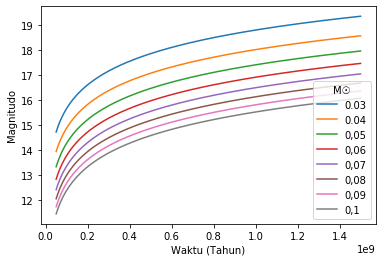

In [17]:
#bagian untuk menjalankan (running) fungsi Stevenson
for m in np.arange(0.03,11e-2,1e-2): #range massa dalam Mo (nilai awal, nilai akhir, increment)
    stevenson(m)
    print(m)
    plt.plot(T_pandas_['Times'],T_pandas_[m])
    plt.xlabel("Waktu (Tahun)")
    plt.ylabel("Magnitudo")
    plt.gca().legend(('0.03','0.04','0,05','0,06','0,07','0,08','0,09','0,1'),title='M☉')

In [18]:
T_pandas_.head()

,Times,0.03,0.04,0.05,0.060000000000000005,0.07,0.08000000000000002,0.09000000000000001,0.1
0,50000000,14.722076,13.941209,13.335522,12.840639,12.422222,12.059772,11.740069,11.454084
1,50010000,14.722348,13.941481,13.335793,12.840910,12.422493,12.060043,11.740340,11.454356
2,50020000,14.722619,13.941752,13.336065,12.841182,12.422764,12.060315,11.740611,11.454627
3,50030000,14.722890,13.942023,13.336336,12.841453,12.423036,12.060586,11.740883,11.454898
4,50040000,14.723162,13.942295,13.336607,12.841724,12.423307,12.060857,11.741154,11.455170


In [19]:
T_pandas_.tail()

,Times,0.03,0.04,0.05,0.060000000000000005,0.07,0.08000000000000002,0.09000000000000001,0.1
144995,1499950000,19.338035,18.557168,17.951480,17.456598,17.038180,16.675731,16.356027,16.070043
144996,1499960000,19.338044,18.557177,17.951489,17.456607,17.038189,16.675740,16.356036,16.070052
144997,1499970000,19.338053,18.557186,17.951499,17.456616,17.038198,16.675749,16.356045,16.070061
144998,1499980000,19.338062,18.557195,17.951508,17.456625,17.038207,16.675758,16.356054,16.070070
144999,1499990000,19.338071,18.557204,17.951517,17.456634,17.038216,16.675767,16.356063,16.070079


0.03
0.04
0.05
0.060000000000000005
0.07
0.08000000000000002
0.09000000000000001
0.1


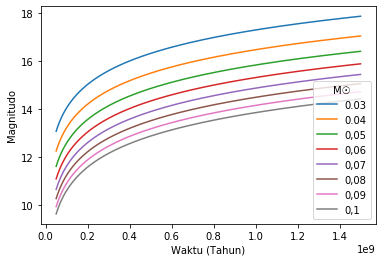

In [20]:
#bagian untuk menjalankan (running) fungsi Burrows
for m in np.arange(0.03,11e-2,1e-2): #range massa dalam Mo (nilai awal, nilai akhir, increment)
    burrows(m)
    print(m)
    plt.plot(T_pandas_['Times'],T_pandas_[m])
    plt.xlabel("Waktu (Tahun)")
    plt.ylabel("Magnitudo")
    plt.gca().legend(('0.03','0.04','0,05','0,06','0,07','0,08','0,09','0,1'),title='M☉')

In [21]:
T_pandas_.head()

,Times,0.03,0.04,0.05,0.060000000000000005,0.07,0.08000000000000002,0.09000000000000001,0.1
0,50000000,13.084739,12.260144,11.620538,11.097942,10.656093,10.273346,9.935739,9.633740
1,50010000,13.085022,12.260426,11.620820,11.098224,10.656375,10.273628,9.936021,9.634022
2,50020000,13.085304,12.260708,11.621102,11.098506,10.656657,10.273910,9.936304,9.634304
3,50030000,13.085586,12.260990,11.621384,11.098788,10.656939,10.274192,9.936586,9.634586
4,50040000,13.085868,12.261273,11.621666,11.099070,10.657221,10.274475,9.936868,9.634868


In [22]:
T_pandas_.tail()

,Times,0.03,0.04,0.05,0.060000000000000005,0.07,0.08000000000000002,0.09000000000000001,0.1
144995,1499950000,17.885337,17.060741,16.421135,15.898539,15.456690,15.073943,14.736336,14.434337
144996,1499960000,17.885346,17.060750,16.421144,15.898548,15.456699,15.073952,14.736346,14.434346
144997,1499970000,17.885355,17.060760,16.421154,15.898557,15.456709,15.073962,14.736355,14.434356
144998,1499980000,17.885365,17.060769,16.421163,15.898567,15.456718,15.073971,14.736364,14.434365
144999,1499990000,17.885374,17.060778,16.421172,15.898576,15.456727,15.073981,14.736374,14.434374
